In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.metrics as metrics

from subprocess import check_output
print(check_output(["ls", "../data_root/raw"]).decode("utf8"))

wine_dataset.csv



In [3]:
input_csv = '../data_root/raw/wine_dataset.csv'
init_data = pd.read_csv(input_csv, index_col= 0)

print("Number of rows before processing:", len(init_data))
print()
print("Summary of numerical columns: ")
print(init_data.describe())
print()
print("Summary of missing data: ")
print(init_data.isna().sum())
print()
print("Sample data: ")
init_data.head()


Number of rows before processing: 10000

Summary of numerical columns: 
             points        price
count  10000.000000  9323.000000
mean      88.460000    35.447603
std        3.030003    40.898626
min       80.000000     5.000000
25%       86.000000    17.000000
50%       88.000000    25.000000
75%       91.000000    42.000000
max      100.000000  1300.000000

Summary of missing data: 
country                     6
description                 0
designation              2829
points                      0
price                     677
province                    6
region_1                 1664
region_2                 6147
taster_name              1985
taster_twitter_handle    2356
title                       0
variety                     0
winery                      0
dtype: int64

Sample data: 


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


In [4]:
selected_data = init_data[['country', 'description', 'points', 'price', 
    'province', 'title', 'variety','winery']]

deduped_data = selected_data[~selected_data.duplicated()]
print("Number of rows after removing duplicates:",
      len(deduped_data))

data = deduped_data.dropna()
print("Number of rows after removing missing data:" , len(data))

Number of rows after removing duplicates: 9942
Number of rows after removing missing data: 9261


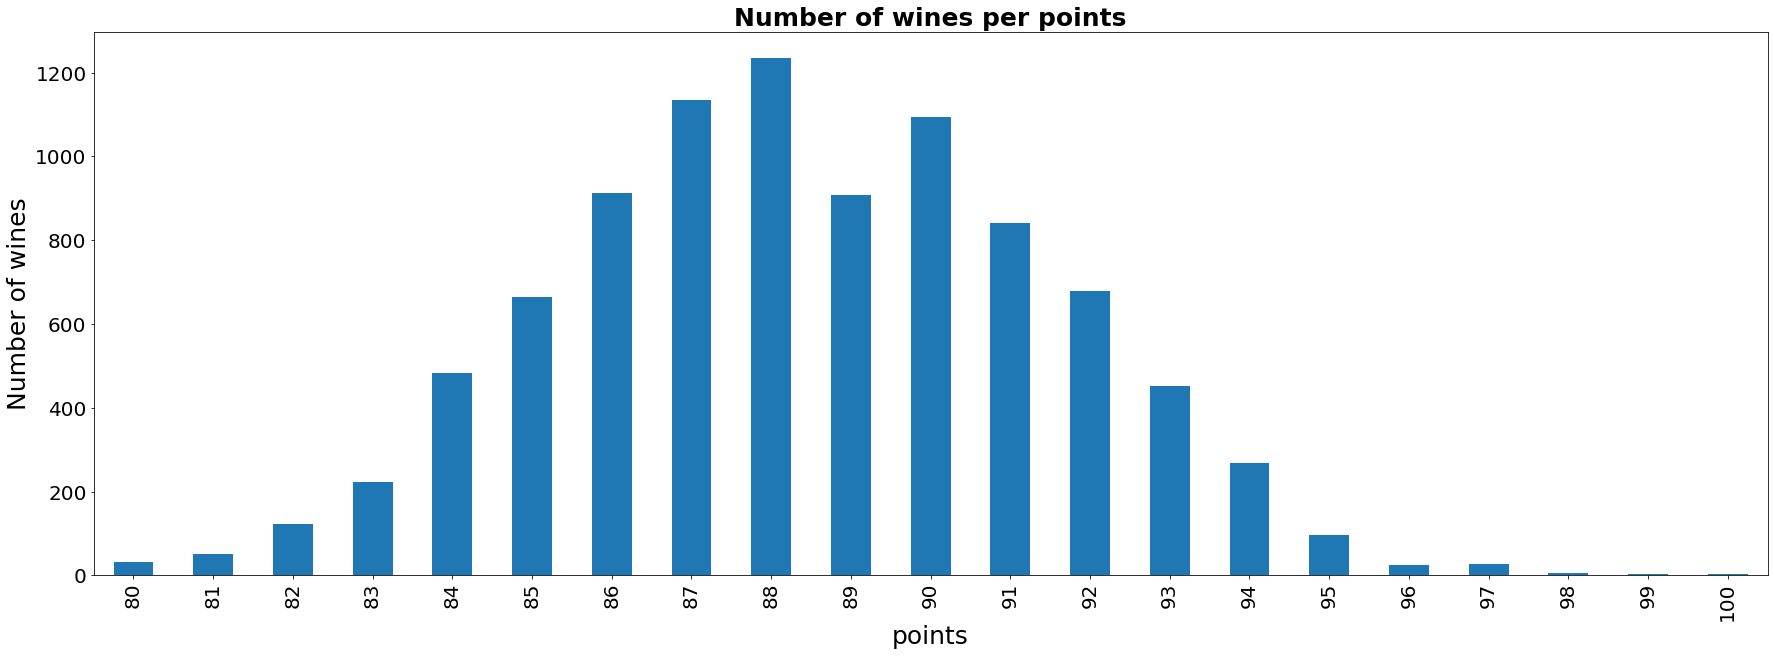

In [5]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
data.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [6]:
data.describe()

,points,price
count,9261.000000,9261.000000
mean,88.439909,35.466472
std,3.041822,40.988869
min,80.000000,5.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,1300.000000


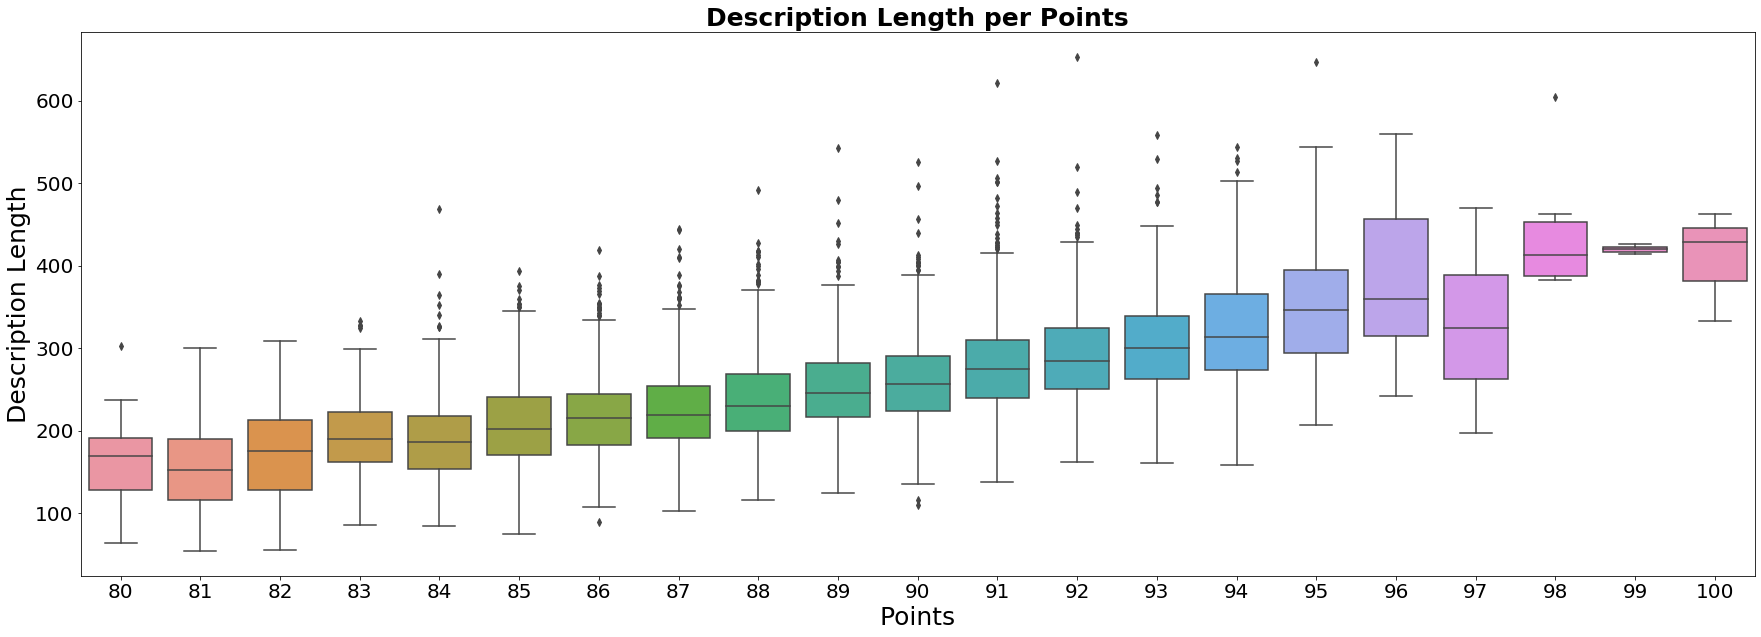

In [7]:
data = data.assign(description_length = data['description'].apply(len))

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [21]:
#Transform to wine enthusiast score categories

def transform_points_simplified(points):
    if points < 83:
        return 1
    elif points >= 83 and points < 87:
        return 2 
    elif points >= 87 and points < 90:
        return 3 
    elif points >= 90 and points < 94:
        return 4 
    elif points >= 94 and points < 98:
        return 5 
    elif points >= 98:
        return 6 

#Applying transform method and assigning result to new column "points_simplified"
data = data.assign(points_simplified = data['points'].apply(transform_points_simplified))

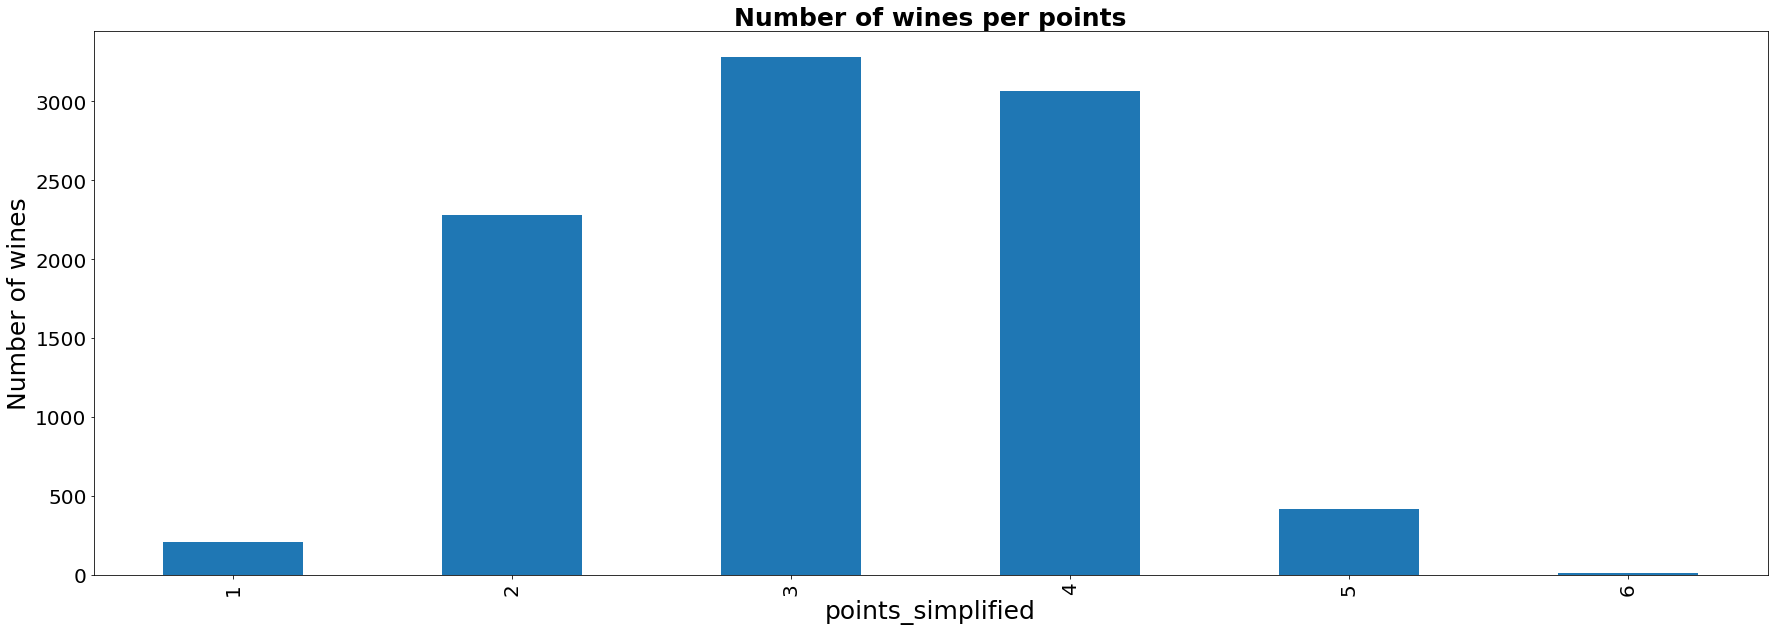

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
data.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

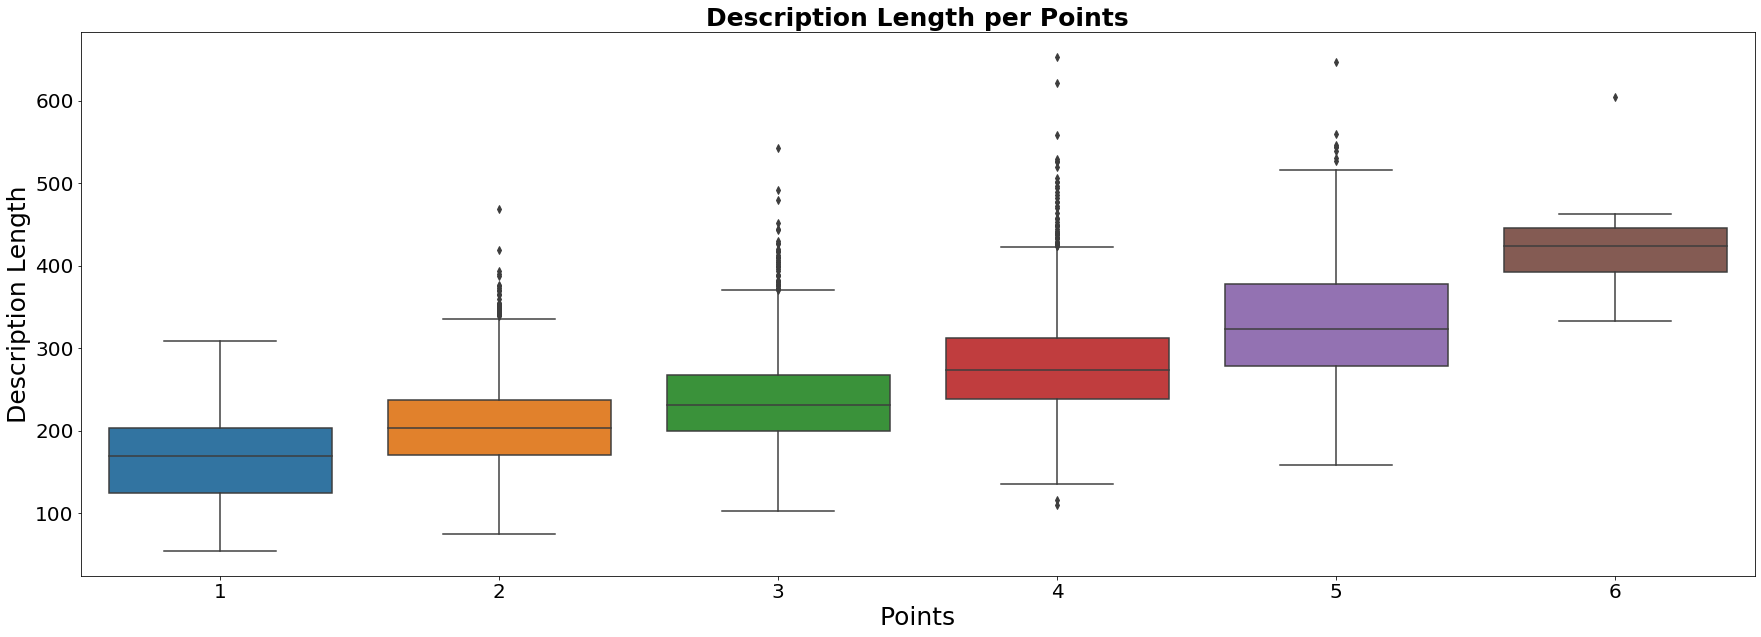

In [23]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points_simplified', y='description_length', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()